In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e803237e-f541-4a34-99b5-3cd8d4f78323',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-24T20:10:35.745Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9331}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10186, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all the columns, not just around 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10186,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935529e+07,1.935529e+07,False,NaN,1,NaN,NaN,None,2023-04-24T20:08:00.000Z,27425.148392,1.761770e+10,35.9475,0.289220,-0.089524,-7.018370,0.547293,14.079082,19.179307,5.308218e+11,45.9898,5.759281e+11,None,2023-04-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 20:10:47.104806+00:00
1,1027,Ethereum,ETH,ethereum,6776,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204090e+08,1.204090e+08,False,NaN,2,NaN,NaN,None,2023-04-24T20:08:00.000Z,1836.820042,8.496312e+09,30.0491,0.253471,-0.289809,-11.726503,6.681402,10.895444,13.156108,2.211697e+11,19.1424,2.211697e+11,None,2023-04-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 20:10:47.104806+00:00
2,825,Tether,USDT,tether,51812,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.145187e+10,8.509064e+10,False,NaN,3,NaN,NaN,None,2023-04-24T20:08:00.000Z,1.000111,2.560711e+10,27.6055,-0.003565,-0.013488,-0.023216,-0.077618,-0.000801,0.001112,8.146090e+10,7.0542,8.510007e+10,None,2023-04-24T20:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-24 20:10:47.104806+00:00
3,1839,BNB,BNB,bnb,1279,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558639e+08,1.558639e+08,False,NaN,4,NaN,NaN,None,2023-04-24T20:08:00.000Z,332.216593,6.706927e+08,4.3461,0.193514,1.317875,-2.948686,3.697515,7.265399,6.872402,5.178058e+10,4.4840,5.178058e+10,None,2023-04-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 20:10:47.104806+00:00
4,3408,USD Coin,USDC,usd-coin,12000,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.069750e+10,3.069750e+10,False,NaN,5,NaN,NaN,None,2023-04-24T20:08:00.000Z,0.999993,4.414732e+09,30.1873,-0.004501,0.005908,0.027962,0.027734,-0.006873,0.007938,3.069727e+10,2.6583,3.069727e+10,None,2023-04-24T20:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-24 20:10:47.104806+00:00
5,52,XRP,XRP,xrp,936,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,None,2023-04-24T20:08:00.000Z,0.460275,1.277096e+09,83.6559,0.426985,0.105285,-9.893474,2.318460,17.554739,8.595390,2.381961e+10,2.0627,4.602752e+10,None,2023-04-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 20:10:47.104806+00:00
6,2010,Cardano,ADA,cardano,768,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.479673e+10,3.571130e+10,False,NaN,7,NaN,NaN,None,2023-04-24T20:08:00.000Z,0.382705,2.893692e+08,25.3691,-0.295510,-0.182696,-12.580619,9.283839,-0.453893,1.121239,1.331688e+10,1.1538,1.722172e+10,None,2023-04-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 20:10:47.104806+00:00
7,74,Dogecoin,DOGE,dogecoin,694,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.390734e+11,1.390734e+11,False,NaN,8,NaN,NaN,None,2023-04-24T20:08:00.000Z,0.078359,4.011288e+08,17.7500,-0.214014,0.675772,-14.718606,7.139600,-7.405380,-11.514608,1.089766e+10,0.9442,1.089766e+10,None,2023-04-24T20:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 20:10:47.104806+00:00
8,3890,Polygon,MATIC,polygon,669,2019-04-28T00:00:00.000Z,"[platform, en

In [6]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e803237e-f541-4a34-99b5-3cd8d4f78323',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df
    
    if not os.path.isfile(r'C:\Users\James\Desktop\Data analyst\Python Crypto Scripts\API.csv'):
        df.to_csv(r'C:\Users\James\Desktop\Data analyst\Python Crypto Scripts\API.csv', header = 'column_names')
    else: 
        df.to_csv(r'C:\Users\James\Desktop\Data analyst\Python Crypto Scripts\API.csv', mode ='a', header=False)

    

In [ ]:
# gives the ability to track time to call the function in certain time periods.

import os 
from time import time
from time import sleep

for i in range(200):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-04-24T19:55:42.629Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9331}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10186, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [7]:
df66 = pd.read_csv(r'C:\Users\James\Desktop\Data analyst\Python Crypto Scripts\API.csv')
df66

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10186,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.935529e+07,1.935529e+07,False,NaN,1,NaN,NaN,NaN,2023-04-24T19:05:00.000Z,27341.871302,1.761192e+10,35.2804,-0.075850,-0.550472,-7.380585,0.026070,14.593084,18.957949,5.292099e+11,45.8494,5.741793e+11,NaN,2023-04-24T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:08:02.502794+00:00
1,1,1027,Ethereum,ETH,ethereum,6775,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204090e+08,1.204090e+08,False,NaN,2,NaN,NaN,NaN,2023-04-24T19:05:00.000Z,1831.895277,8.580604e+09,33.3903,-0.106646,-0.987790,-12.164419,5.999581,11.359951,13.059592,2.205767e+11,19.1095,2.205767e+11,NaN,2023-04-24T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:08:02.502794+00:00
2,2,825,Tether,USDT,tether,51808,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.145187e+10,8.509064e+10,False,NaN,3,NaN,NaN,NaN,2023-04-24T19:05:00.000Z,1.000120,2.575774e+10,29.9791,-0.000694,-0.020019,-0.019951,-0.077187,0.000307,0.001092,8.146162e+10,7.0574,8.510083e+10,NaN,2023-04-24T19:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-24 19:08:02.502794+00:00
3,3,1839,BNB,BNB,bnb,1278,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558639e+08,1.558639e+08,False,NaN,4,NaN,NaN,NaN,2023-04-24T19:05:00.000Z,331.468199,6.745081e+08,5.1737,0.120568,0.897102,-2.973045,3.450553,7.465793,6.732932,5.166394e+10,4.4759,5.166394e+10,NaN,2023-04-24T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:08:02.502794+00:00
4,4,3408,USD Coin,USDC,usd-coin,12000,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.069750e+10,3.069750e+10,False,NaN,5,NaN,NaN,NaN,2023-04-24T19:05:00.000Z,0.999970,4.430322e+09,30.6466,-0.010207,-0.003708,0.019300,0.018496,0.006394,0.006460,3.069657e+10,2.6594,3.069657e+10,NaN,2023-04-24T19:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-24 19:08:02.502794+00:00
5,5,52,XRP,XRP,xrp,936,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,NaN,2023-04-24T19:05:00.000Z,0.458022,1.277495e+09,69.9012,0.449707,0.396270,-10.406705,0.207803,17.824793,8.498883,2.370303e+10,2.0535,4.580223e+10,NaN,2023-04-24T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:08:02.502794+00:00
6,6,2010,Cardano,ADA,cardano,768,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.479673e+10,3.571130e+10,False,NaN,7,NaN,NaN,NaN,2023-04-24T19:05:00.000Z,0.383630,2.892223e+08,23.3584,-0.377491,0.148737,-12.400825,9.148080,0.427750,1.782818,1.334906e+10,1.1567,1.726334e+10,NaN,2023-04-24T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:08:02.502794+00:00
7,7,74,Dogecoin,DOGE,dogecoin,694,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.390734e+11,1.390734e+11,False,NaN,8,NaN,NaN,NaN,2023-04-24T19:05:00.000Z,0.078522,4.088310e+08,15.9875,-0.010378,1.212158,-13.779522,6.363194,-6.759453,-11.065540,1.092036e+10,0.9461,1.092036e+10,NaN,2023-04-24T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:08:02.502794+00:00
8,8,3890,Polygon,MATIC,polygon,669,2019-04-28T00:00:00.000Z,"

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10186,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935529e+07,1.935529e+07,False,NaN,1,NaN,NaN,None,2023-04-24T19:36:00.000Z,27378.962826,1.763604e+10,35.0379,-0.008920,-0.404086,-7.311905,0.240721,13.979402,19.042842,5.299278e+11,45.9329,5.749582e+11,None,2023-04-24T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:37:53.294221+00:00
1,1027,Ethereum,ETH,ethereum,6776,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204090e+08,1.204090e+08,False,NaN,2,NaN,NaN,None,2023-04-24T19:36:00.000Z,1832.496663,8.546461e+09,31.2430,-0.089771,-0.800626,-12.096153,5.845809,10.711207,13.006358,2.206491e+11,19.1247,2.206491e+11,None,2023-04-24T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:37:53.294221+00:00
2,825,Tether,USDT,tether,51809,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.145187e+10,8.509064e+10,False,NaN,3,NaN,NaN,None,2023-04-24T19:36:00.000Z,1.000082,2.569044e+10,28.6770,-0.012908,-0.008436,-0.022526,-0.100228,-0.003450,-0.000511,8.145854e+10,7.0604,8.509761e+10,None,2023-04-24T19:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-24 19:37:53.294221+00:00
3,1839,BNB,BNB,bnb,1278,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558639e+08,1.558639e+08,False,NaN,4,NaN,NaN,None,2023-04-24T19:36:00.000Z,331.868540,6.742360e+08,4.9915,0.223852,1.169399,-3.085730,3.588834,7.258039,6.918826,5.172634e+10,4.4834,5.172634e+10,None,2023-04-24T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:37:53.294221+00:00
4,3408,USD Coin,USDC,usd-coin,12000,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.069750e+10,3.069750e+10,False,NaN,5,NaN,NaN,None,2023-04-24T19:36:00.000Z,1.000074,4.431402e+09,30.0307,0.005657,0.020404,0.023009,0.000697,-0.001347,0.009448,3.069977e+10,2.6609,3.069977e+10,None,2023-04-24T19:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-24 19:37:53.294221+00:00
5,52,XRP,XRP,xrp,936,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,None,2023-04-24T19:36:00.000Z,0.459154,1.277245e+09,69.1897,0.502484,0.350759,-10.112414,0.017009,17.453095,8.531619,2.376157e+10,2.0595,4.591537e+10,None,2023-04-24T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:37:53.294221+00:00
6,2010,Cardano,ADA,cardano,768,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.479673e+10,3.571130e+10,False,NaN,7,NaN,NaN,None,2023-04-24T19:36:00.000Z,0.382649,2.887866e+08,21.7510,-0.809337,-0.149341,-12.724826,9.075189,-0.341609,1.375142,1.331492e+10,1.1540,1.721919e+10,None,2023-04-24T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:37:53.294221+00:00
7,74,Dogecoin,DOGE,dogecoin,694,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.390734e+11,1.390734e+11,False,NaN,8,NaN,NaN,None,2023-04-24T19:36:00.000Z,0.078352,4.043467e+08,12.0655,-0.450731,0.585366,-14.501711,6.994545,-7.331277,-11.374328,1.089672e+10,0.9445,1.089672e+10,None,2023-04-24T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:37:53.294221+00:00
8,3890,Polygon,MATIC,polygon,669,2019-04-28T00:00:00.000Z,"[platform,

In [8]:
# Change the scientific numbers into more readable ones with lambda.
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10186,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19355293.00000,19355293.00000,False,NaN,1,NaN,NaN,None,2023-04-24T19:06:00.000Z,27342.48788,17610732435.05745,35.26850,-0.13036,-0.53943,-7.35851,0.00219,14.59015,18.97252,529221864219.64288,45.85040,574192245429.32996,None,2023-04-24T19:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:09:02.687838+00:00
1,1027,Ethereum,ETH,ethereum,6775,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120409031.53854,120409031.53854,False,NaN,2,NaN,NaN,None,2023-04-24T19:06:00.000Z,1831.75143,8579997214.27415,33.35750,-0.14901,-1.00291,-12.14580,5.93166,11.34283,13.07243,220559415392.34998,19.10800,220559415392.35001,None,2023-04-24T19:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:09:02.687838+00:00
2,825,Tether,USDT,tether,51808,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81451868887.64314,85090638896.27377,False,NaN,3,NaN,NaN,None,2023-04-24T19:06:00.000Z,1.00013,25753986399.04118,29.94870,-0.01117,-0.01365,-0.02217,-0.06923,0.00045,0.00222,81462322391.96530,7.05740,85101559399.06000,None,2023-04-24T19:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-24 19:09:02.687838+00:00
3,1839,BNB,BNB,bnb,1278,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155863932.58277,155863932.58277,False,NaN,4,NaN,NaN,None,2023-04-24T19:06:00.000Z,331.50475,674254287.32874,5.09120,0.13152,0.90070,-2.96186,3.50182,7.47229,6.75565,51669633296.78133,4.47640,51669633296.78000,None,2023-04-24T19:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:09:02.687838+00:00
4,3408,USD Coin,USDC,usd-coin,12000,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30697495957.80815,30697495957.80815,False,NaN,5,NaN,NaN,None,2023-04-24T19:06:00.000Z,0.99999,4430768725.44843,30.66520,-0.02255,0.00332,0.02607,0.02401,0.00468,0.00221,30697199229.66132,2.65940,30697199229.66000,None,2023-04-24T19:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-24 19:09:02.687838+00:00
5,52,XRP,XRP,xrp,936,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,None,2023-04-24T19:06:00.000Z,0.45804,1277480178.85465,69.90540,0.45786,0.38469,-10.39495,0.21797,17.82537,8.52061,23704024177.53553,2.05360,45804160368.50000,None,2023-04-24T19:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:09:02.687838+00:00
6,2010,Cardano,ADA,cardano,768,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34796730471.13700,35711298229.44300,False,NaN,7,NaN,NaN,None,2023-04-24T19:06:00.000Z,0.38366,289171494.74755,23.33240,-0.36547,0.13886,-12.39005,9.19075,0.44088,1.80286,13350281828.69566,1.15680,17264917541.31000,None,2023-04-24T19:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-24 19:09:02.687838+00:00
7,74,Dogecoin,DOGE,dogecoin,694,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139073416383.70520,139073416383.70520,False,NaN,8,NaN,NaN,None,2023-04-24T19:06:00.000Z,0.07853,408568951.90127,15.83140,0.00595,1.19348,-13.77017,6.39442,-6.75692,-11.05161,10920801356.01922,0.94610,10920801356

In [9]:
# Group the findings and sort by the average (mean())

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.28922,-0.08952,-7.01837,0.54729,14.07908,19.17931
Ethereum,0.25347,-0.28981,-11.72650,6.68140,10.89544,13.15611
Tether,-0.00356,-0.01349,-0.02322,-0.07762,-0.00080,0.00111
BNB,0.19351,1.31787,-2.94869,3.69751,7.26540,6.87240
USD Coin,-0.00450,0.00591,0.02796,0.02773,-0.00687,0.00794
XRP,0.42699,0.10528,-9.89347,2.31846,17.55474,8.59539
Cardano,-0.29551,-0.18270,-12.58062,9.28384,-0.45389,1.12124
Dogecoin,-0.21401,0.67577,-14.71861,7.13960,-7.40538,-11.51461
Polygon,-0.15320,0.52541,-14.86092,-7.21283,-27.16052,-1.44100


In [10]:
# Data frames can be kept as df but I am changing the number to show the progression:
# Using stack () we can see the information much better here than in a standard plot above.
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.28922
                 quote.USD.percent_change_24h    -0.08952
                 quote.USD.percent_change_7d     -7.01837
                 quote.USD.percent_change_30d     0.54729
                 quote.USD.percent_change_60d    14.07908
                 quote.USD.percent_change_90d    19.17931
Ethereum         quote.USD.percent_change_1h      0.25347
                 quote.USD.percent_change_24h    -0.28981
                 quote.USD.percent_change_7d    -11.72650
                 quote.USD.percent_change_30d     6.68140
                 quote.USD.percent_change_60d    10.89544
                 quote.USD.percent_change_90d    13.15611
Tether           quote.USD.percent_change_1h     -0.00356
                 quote.USD.percent_change_24h    -0.01349
                 quote.USD.percent_change_7d     -0.02322
                 quote.USD.percent_change_30d    -0.07762
                 quote.USD

In [11]:
# we dont want df4 to be a series, we want it to be a dataframe type as show below (it will become df5 just for showcasing.)

type(df4)

pandas.core.series.Series

In [12]:
df5 = df4.to_frame(name= 'values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.28922
                quote.USD.percent_change_24h  -0.08952
                quote.USD.percent_change_7d   -7.01837
                quote.USD.percent_change_30d   0.54729
                quote.USD.percent_change_60d  14.07908
                quote.USD.percent_change_90d  19.17931
Ethereum        quote.USD.percent_change_1h    0.25347
                quote.USD.percent_change_24h  -0.28981
                quote.USD.percent_change_7d  -11.72650
                quote.USD.percent_change_30d   6.68140
                quote.USD.percent_change_60d  10.89544
                quote.USD.percent_change_90d  13.15611
Tether          quote.USD.percent_change_1h   -0.00356
                quote.USD.percent_change_24h  -0.01349
                quote.USD.percent_change_7d   -0.02322
                quote.USD.percent_change_30d  -0.07762
                quote.USD.percent_change_60d  -0.00080
                quote.USD.percent_change_90d   0.00111
BNB             quote.USD.percent_change_1h    0.19351
                quote.USD.percent_change_24h   1.31787
                quote.USD.percent_change_7d   -2.94869
                quote.USD.percent_change_30d   3.69751
                quote.USD.percent_change_60d   7.26540
                quote.USD.percent_change_90d   6.87240
USD Coin        quote.USD.percent_change_1h   -0.00450
                quote.USD.percent_change_24h   0.00591
                quote.USD.percent_change_7d    0.02796
                quote.USD.percent_change_30d   0.02773
                quote.USD.percent_change_60d  -0.00687
                quote.USD.percent_change_90d   0.00794
XRP             quote.USD.percent_change_1h    0.42699
                quote.USD.percent_change_24h   0.10528
                quote.USD.percent_change_7d   -9.89347
                quote.USD.percent_change_30d   2.31846
                quote.USD.percent_change_60d  17.55474
                quote.USD.percent_change_90d   8.59539
Cardano         quote.USD.percent_change_1h   -0.29551
                quote.USD.percent_change_24h  -0.18270
                quote.USD.percent_change_7d  -12.58062
                quote.USD.percent_change_30d   9.28384
                quote.USD.percent_change_60d  -0.45389
                quote.USD.percent_change_90d   1.12124
Dogecoin        quote.USD.percent_change_1h   -0.21401
                quote.USD.percent_change_24h   0.67577
                quote.USD.percent_change_7d  -14.71861
                quote.USD.percent_change_30d   7.13960
                quote.USD.percent_change_60d  -7.40538
                quote.USD.percent_change_90d -11.51461
Polygon         quote.USD.percent_change_1h   -0.15320
                quote.USD.percent_change_24h   0.52541
                quote.USD.percent_change_7d  -14.86092
                quote.USD.percent_change_30d  -7.21283
                quote.USD.percent_change_60d -27.16052
                quote.USD.percent_change_90d  -1.44100
Solana          quote.USD.percent_change_1h   -0.12629
                quote.USD.percent_change_24h   0.85160
                quote.USD.percent_change_7d  -13.72896
                quote.USD.percent_change_30d   5.57018
                quote.USD.percent_change_60d -11.46718
                quote.USD.percent_change_90d -12.79820
Polkadot        quote.USD.percent_change_1h   -0.01081
                quote.USD.percent_change_24h   1.81107
                quote.USD.percent_change_7d  -11.63012
                quote.USD.percent_change_30d   1.00900
                quote.USD.percent_change_60d -16.95054
                quote.USD.percent_change_90d  -8.95425
Binance USD     quote.USD.percent_change_1h    0.00678
                quote.USD.percent_change_24h  -0.01321
                quote.USD.percent_change_7d    0.00511
                quote.USD.percent_change_30d   0.06312
                quote.USD.percent_change_60d  -0.01570
                quote.USD.percent

In [13]:
df5.count()

values    120
dtype: int64

In [14]:
# Need to add an index to the table. REMEMBER INDEX NEEDS A CAPITAL I.

index = pd.Index(range(120)) 

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.28922
1,Bitcoin,quote.USD.percent_change_24h,-0.08952
2,Bitcoin,quote.USD.percent_change_7d,-7.01837
3,Bitcoin,quote.USD.percent_change_30d,0.54729
4,Bitcoin,quote.USD.percent_change_60d,14.07908
5,Bitcoin,quote.USD.percent_change_90d,19.17931
6,Ethereum,quote.USD.percent_change_1h,0.25347
7,Ethereum,quote.USD.percent_change_24h,-0.28981
8,Ethereum,quote.USD.percent_change_7d,-11.72650
9,Ethereum,quote.USD.percent_change_30d,6.68140


In [15]:
# rename the column to look more professional:

df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.28922
1,Bitcoin,quote.USD.percent_change_24h,-0.08952
2,Bitcoin,quote.USD.percent_change_7d,-7.01837
3,Bitcoin,quote.USD.percent_change_30d,0.54729
4,Bitcoin,quote.USD.percent_change_60d,14.07908
5,Bitcoin,quote.USD.percent_change_90d,19.17931
6,Ethereum,quote.USD.percent_change_1h,0.25347
7,Ethereum,quote.USD.percent_change_24h,-0.28981
8,Ethereum,quote.USD.percent_change_7d,-11.72650
9,Ethereum,quote.USD.percent_change_30d,6.68140


In [19]:
# rename the percent_change to make it look better in the visualisation:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.28922
1,Bitcoin,24h,-0.08952
2,Bitcoin,7d,-7.01837
3,Bitcoin,30d,0.54729
4,Bitcoin,60d,14.07908
5,Bitcoin,90d,19.17931
6,Ethereum,1h,0.25347
7,Ethereum,24h,-0.28981
8,Ethereum,7d,-11.72650
9,Ethereum,30d,6.68140


In [16]:
import seaborn as sns
import mapplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mapplotlib'

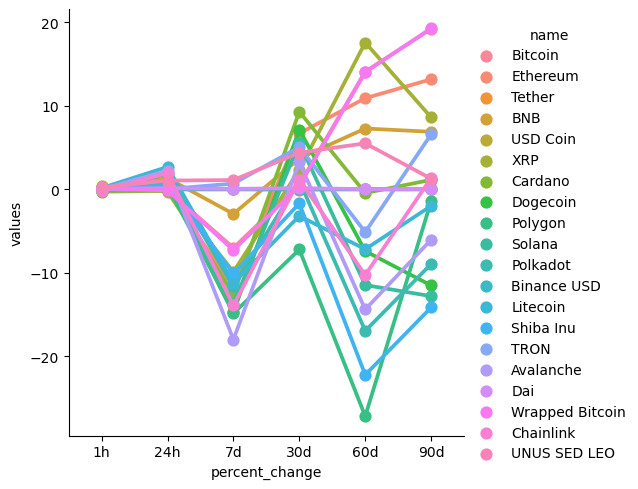

In [20]:
# visualise the data using a point plot after importing the above packages:
sns.catplot(x='percent_change',y='values', hue='name', data=df7, kind='point')

In [25]:
# Look at a specific currency/crypto: but obviously get more samples, this is just the code.

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27425.14839,2023-04-24 20:10:47.104806+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

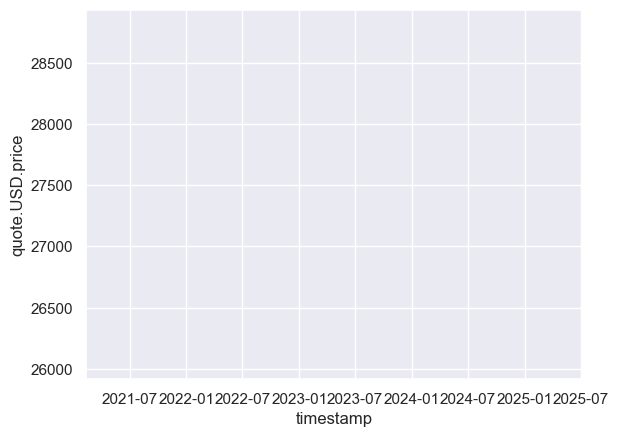

In [31]:
#If you have more data in here it will appear. can be shown over days week and months to your liking. Once again
# this is just the code, I will be using this over the next few months to measure bitcoin and other cryptos.
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)